In [244]:
import os
from pprint import pprint

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [245]:
ROOT_DIR = "data"
RANDOM_STATE = 110

# Load data
train_data = pd.read_csv(os.path.join(ROOT_DIR, "train.csv"))
train_data


Wip Line_Dam Process Desc._Dam     Equipment_Dam Model.Suffix_Dam  \
0          IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334505   
1          IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334505   
2          IVI-OB6     Dam Dispenser  Dam dispenser #2      AJX75334501   
3          IVI-OB6     Dam Dispenser  Dam dispenser #2      AJX75334501   
4          IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334501   
...            ...               ...               ...              ...   
40501      IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334501   
40502      IVI-OB6     Dam Dispenser  Dam dispenser #2      AJX75334501   
40503      IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334501   
40504      IVI-OB6     Dam Dispenser  Dam dispenser #2      AJX75334501   
40505      IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334501   

      Workorder_Dam  Insp. Seq No._Dam Insp Judge Code_Dam  \
0        4F1XA938-1                  1                  OK   
1        3KPM0016-2                  1                  OK   
2        4E1X9167-1                  1                  OK   
3        3K1X0057-1                  1                  OK   
4        3HPM0007-1                  1                  OK   
...             ...                ...                 ...   
40501    3J1XF434-2                  1                  OK   
40502    4E1XC796-1                  1                  OK   
40503    4C1XD438-1                  1                  OK   
40504    3I1XA258-1                  1                  OK   
40505    3G1XA501-1                  1                  OK   

       CURE END POSITION X Collect Result_Dam  \
0                                       240.0   
1                                       240.0   
2                                      1000.0   
3                                      1000.0   
4                                       240.0   
...                                       ...   
40501                                   240.0   
40502                                  1000.0   
40503                                   240.0   
40504                                  1000.0   
40505                                   240.0   

       CURE END POSITION X Unit Time_Dam  CURE END POSITION X Judge Value_Dam  \
0                                    NaN                                  NaN   
1                                    NaN                                  NaN   
2                                    NaN                                  NaN   
3                                    NaN                                  NaN   
4                                    NaN                                  NaN   
...                                  ...                                  ...   
40501                                NaN                                  NaN   
40502                                NaN                                  NaN   
40503                                NaN                                  NaN   
40504                                NaN                                  NaN   
40505                                NaN                                  NaN   

       ...  Production Qty Collect Result_Fill2  \
0      ...                                    7   
1      ...                                  185   
2      ...                                   10   
3      ...                                  268   
4      ...                                  121   
...    ...                                  ...   
40501  ...                                  318   
40502  ...                                   14   
40503  ...                                    1   
40504  ...                                  117   
40505  ...                                  320   

       Production Qty Unit Time_Fill2  Production Qty Judge Value_Fill2  \
0                                 NaN                               NaN   
1                                 N

In [518]:
test_data = pd.read_csv(os.path.join(ROOT_DIR, "test.csv"))
test_data

Set ID Wip Line_Dam Process Desc._Dam  \
0      0001be084fbc4aaa9d921f39e595961b      IVI-OB6     Dam Dispenser   
1      0005bbd180064abd99e63f9ed3e1ac80      IVI-OB6     Dam Dispenser   
2      000948934c4140d883d670adcb609584      IVI-OB6     Dam Dispenser   
3      000a6bfd02874c6296dc7b2e9c5678a7      IVI-OB6     Dam Dispenser   
4      0018e78ce91343678716e2ea27a51c95      IVI-OB6     Dam Dispenser   
...                                 ...          ...               ...   
17356  ffea508b59934d689b540f95eb3fa730      IVI-OB6     Dam Dispenser   
17357  ffed8923c8a448a98afc641b770be153      IVI-OB6     Dam Dispenser   
17358  fff1e73734da40adbe805359b3efb462      IVI-OB6     Dam Dispenser   
17359  fff8e38bdd09470baf95f71e92075dec      IVI-OB6     Dam Dispenser   
17360  fffa83e0a13d4c2db4fd8bf905b517d4      IVI-OB6     Dam Dispenser   

          Equipment_Dam Model.Suffix_Dam Workorder_Dam  Insp. Seq No._Dam  \
0      Dam dispenser #2      AJX75334501    3J1XF767-1                  1   
1      Dam dispenser #2      AJX75334501    4B1XD472-2                  1   
2      Dam dispenser #1      AJX75334501    3H1XE355-1                  1   
3      Dam dispenser #2      AJX75334501    3L1XA128-1                  1   
4      Dam dispenser #1      AJX75334501    4A1XA639-1                  1   
...                 ...              ...           ...                ...   
17356  Dam dispenser #2      AJX75334501    3K1XB597-1                  1   
17357  Dam dispenser #2      AJX75334501    4A1XB974-1                  1   
17358  Dam dispenser #1      AJX75334501    3L1XA998-1                  1   
17359  Dam dispenser #1      AJX75334501    3F1XC376-1                  1   
17360  Dam dispenser #1      AJX75334501    3J1XC756-1                  1   

      Insp Judge Code_Dam  CURE END POSITION X Collect Result_Dam  \
0                      OK                                  1000.0   
1                      OK                                  1000.0   
2                      OK                                   240.0   
3                      OK                                  1000.0   
4                      OK                                   240.0   
...                   ...                                     ...   
17356                  OK                                  1000.0   
17357                  OK                                  1000.0   
17358                  OK                                   240.0   
17359                  OK                                   240.0   
17360                  OK                                   240.0   

       CURE END POSITION X Unit Time_Dam  ...  \
0                                    NaN  ...   
1                                    NaN  ...   
2                                    NaN  ...   
3                                    NaN  ...   
4                                    NaN  ...   
...                                  ...  ...   
17356                                NaN  ...   
17357                                NaN  ...   
17358                                NaN  ...   
17359                                NaN  ...   
17360                                NaN  ...   

       Production Qty Collect Result_Fill2  Production Qty Unit Time_Fill2  \
0                                      195                             NaN   
1                                       14                             NaN   
2                                       98                             NaN   
3                                       14                             NaN   
4                                        1                             NaN   
...                                    ...                             ...   
17356                                   14                             NaN   
17357                                   12                             NaN   
17358                                    4                             NaN   
17359                

In [519]:
test_data.shape

(17361, 465)

In [247]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40506 entries, 0 to 40505
Columns: 464 entries, Wip Line_Dam to target
dtypes: float64(350), int64(77), object(37)
memory usage: 143.4+ MB


In [248]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17361 entries, 0 to 17360
Columns: 465 entries, Set ID to target
dtypes: float64(351), int64(77), object(37)
memory usage: 61.6+ MB


In [249]:
train_data.shape[0]

40506

In [250]:
# 'tt' 칼럼 추가
train_data['tt'] = 'train'
test_data['tt'] = 'test'

In [251]:
train_target = train_data['target']
testSet = test_data['Set ID']
test_target = test_data['target']

In [252]:
test_data = test_data.drop(columns=['Set ID', 'target'])

In [253]:
train_data = train_data.drop(columns = ['target'])

In [254]:
target = pd.concat([train_target, test_target], ignore_index=True)

In [255]:
# 데이터프레임 결합
df = pd.concat([train_data, test_data], ignore_index=True)

In [256]:
# 각 열별 결측치 개수 확인
missing_values_count = (df.isnull().sum())
missing_values_count = missing_values_count/df.shape[0] 
missing_values_ratio = missing_values_count * 100
print(missing_values_ratio)

Wip Line_Dam                       0.0
Process Desc._Dam                  0.0
Equipment_Dam                      0.0
Model.Suffix_Dam                   0.0
Workorder_Dam                      0.0
                                 ...  
Receip No Judge Value_Fill2      100.0
WorkMode Collect Result_Fill2      0.0
WorkMode Unit Time_Fill2         100.0
WorkMode Judge Value_Fill2       100.0
tt                                 0.0
Length: 464, dtype: float64


In [257]:
bins = [0, 20, 40, 60, 80, 100]
missing_values_counts = pd.cut(missing_values_ratio, bins=bins).value_counts().sort_index()

print(missing_values_counts)

(0, 20]        0
(20, 40]       3
(40, 60]       0
(60, 80]       5
(80, 100]    278
Name: count, dtype: int64


(20, 40]에 대해서는 결측치를 채우는 과정을 수행한다.

In [258]:
# 결측치 비율이 80 이상인 열 삭제
threshold = 80
df= df.drop(columns=missing_values_ratio[missing_values_ratio >= threshold].index)


## 데이터 탐색

칼럼들을 각 공정 단계 별로 구별하여 집중해서 보도록 한다.

In [259]:
# "Process Desc"를 포함하는 열의 인덱스 찾기
process_columns = [col for col in df.columns if "Process Desc" in col]
process_indices = [df.columns.get_loc(col) for col in process_columns]

# 새로운 DataFrame을 저장할 딕셔너리 초기화
dfs = {}

# Process Desc에 따라 DataFrame을 나누어 저장
for i, start_idx in enumerate(process_indices):
    end_idx = process_indices[i + 1]-1 if i + 1 < len(process_indices) else len(df.columns)-1
    
    # 각 Process Desc와 그에 해당하는 환경 변수들을 포함하는 DataFrame 생성
    relevant_columns = df.columns[start_idx:end_idx]
    dfs[f'df{i+1}'] = df[relevant_columns]

# 나눠진 DataFrame들을 확인
for name, df_subset in dfs.items():
    print(f'{name}:')
    print(df_subset)
    print('\n')

df1:
      Process Desc._Dam     Equipment_Dam Model.Suffix_Dam Workorder_Dam  \
0         Dam Dispenser  Dam dispenser #1      AJX75334505    4F1XA938-1   
1         Dam Dispenser  Dam dispenser #1      AJX75334505    3KPM0016-2   
2         Dam Dispenser  Dam dispenser #2      AJX75334501    4E1X9167-1   
3         Dam Dispenser  Dam dispenser #2      AJX75334501    3K1X0057-1   
4         Dam Dispenser  Dam dispenser #1      AJX75334501    3HPM0007-1   
...                 ...               ...              ...           ...   
57862     Dam Dispenser  Dam dispenser #2      AJX75334501    3K1XB597-1   
57863     Dam Dispenser  Dam dispenser #2      AJX75334501    4A1XB974-1   
57864     Dam Dispenser  Dam dispenser #1      AJX75334501    3L1XA998-1   
57865     Dam Dispenser  Dam dispenser #1      AJX75334501    3F1XC376-1   
57866     Dam Dispenser  Dam dispenser #1      AJX75334501    3J1XC756-1   

       Insp. Seq No._Dam Insp Judge Code_Dam  \
0                      1          

In [322]:
df1 = dfs['df1']
df2 = dfs['df2']
df3 = dfs['df3']
df4 = dfs['df4']

상수 변수 탐지 : 모든 항이 동일한 상수 변수의 경우 가치가 존재하지 않는다.

In [323]:
# 상수 열 찾기
constant_columns1 = [col for col in df1.columns if df1[col].nunique() == 1]
constant_columns1

['Process Desc._Dam',
 'Insp. Seq No._Dam',
 'Insp Judge Code_Dam',
 'CURE STANDBY POSITION X Collect Result_Dam',
 'CURE STANDBY POSITION Z Collect Result_Dam',
 'CURE STANDBY POSITION Θ Collect Result_Dam',
 'CURE START POSITION Z Collect Result_Dam',
 'HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Dam']

In [324]:
# 상수 열 삭제
df1_cleaned = df1.drop(columns=constant_columns1)
print(df1_cleaned.shape[1])
print(df1.shape[1])

69
77


In [325]:
def remove_constant_columns(df):
    """
    DataFrame에서 상수 열(모든 값이 동일한 열)을 찾아 삭제하고, 삭제된 열의 이름을 반환합니다.
    
    Parameters:
    df (pd.DataFrame): 상수 열을 삭제할 DataFrame

    Returns:
    tuple: (상수 열이 제거된 DataFrame, 삭제된 상수 열의 리스트)
    """
    # 상수 열 찾기
    constant_columns = [col for col in df.columns if df[col].nunique() == 1]
    
    # 상수 열 출력
    print("삭제된 상수 열:", constant_columns)
    
    # 상수 열 삭제
    df_cleaned = df.drop(columns=constant_columns)
    
    return df_cleaned, constant_columns

In [367]:
df2_cleaned, constant_columns2 = remove_constant_columns(df2)
df3_cleaned, constant_columns3 = remove_constant_columns(df3)
df4_cleaned, constant_columns4 = remove_constant_columns(df4)

삭제된 상수 열: ['Process Desc._AutoClave', 'Equipment_AutoClave', 'Insp. Seq No._AutoClave', 'Insp Judge Code_AutoClave', '1st Pressure Judge Value_AutoClave', '2nd Pressure Judge Value_AutoClave', '3rd Pressure Judge Value_AutoClave', 'GMES_ORIGIN_INSP_JUDGE_CODE Collect Result_AutoClave', 'GMES_ORIGIN_INSP_JUDGE_CODE Judge Value_AutoClave']
삭제된 상수 열: ['Process Desc._Fill1', 'Insp. Seq No._Fill1', 'Insp Judge Code_Fill1', 'HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Fill1']
삭제된 상수 열: ['Process Desc._Fill2', 'Insp. Seq No._Fill2', 'Insp Judge Code_Fill2', 'CURE END POSITION Θ Collect Result_Fill2', 'CURE STANDBY POSITION X Collect Result_Fill2', 'CURE STANDBY POSITION Θ Collect Result_Fill2', 'CURE START POSITION Θ Collect Result_Fill2', 'DISCHARGED SPEED OF RESIN Collect Result_Fill2', 'DISCHARGED TIME OF RESIN(Stage1) Collect Result_Fill2', 'DISCHARGED TIME OF RESIN(Stage2) Collect Result_Fill2', 'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Fill2', 'Dispense Volume(Stage1) Colle

# 중복값 확인 및 제거

공정 단계 별로 봤을 때 중복값이 존재한다.

In [327]:
df.shape

(57867, 186)

In [328]:
print(df.duplicated(keep = False).sum())

0


In [329]:
print(df1_cleaned.duplicated(keep = False).sum())

0


In [330]:
print(df2_cleaned.duplicated(keep = False).sum())

57476


In [331]:
print(df3_cleaned.duplicated(keep = False).sum())

2


In [332]:
print(df4_cleaned.duplicated(keep = False).sum())

2


## 피처 줄이기를 위한 상관 관계 및 의미 분석.
df2는 빼고 진행한다.
좌표를 합칠 수 있다면 좋아 보이기도 함.

In [333]:
df1_cleaned.columns

Index(['Equipment_Dam', 'Model.Suffix_Dam', 'Workorder_Dam',
       'CURE END POSITION X Collect Result_Dam',
       'CURE END POSITION Z Collect Result_Dam',
       'CURE END POSITION Θ Collect Result_Dam',
       'CURE SPEED Collect Result_Dam',
       'CURE START POSITION X Collect Result_Dam',
       'CURE START POSITION Θ Collect Result_Dam',
       'DISCHARGED SPEED OF RESIN Collect Result_Dam',
       'DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam',
       'DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam',
       'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam',
       'Dispense Volume(Stage1) Collect Result_Dam',
       'Dispense Volume(Stage2) Collect Result_Dam',
       'Dispense Volume(Stage3) Collect Result_Dam',
       'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam',
       'HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam',
       'HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam',
       'HEAD NORMAL COORDINATE Y AXIS(Stage1) Col

In [334]:
# 새로운 칼럼 생성
df1_cleaned['CURE POSITION (X, Z, Θ)'] = list(zip(df1_cleaned['Equipment_Dam'],
                                        df1_cleaned['CURE END POSITION X Collect Result_Dam'],
                                        df1_cleaned['CURE END POSITION Z Collect Result_Dam'],
                                        df1_cleaned['CURE END POSITION Θ Collect Result_Dam'],
                                        df1_cleaned['CURE START POSITION X Collect Result_Dam'],
                                        df1_cleaned['CURE START POSITION Θ Collect Result_Dam']))

In [335]:
# unique 값의 개수 출력
unique_count = df1_cleaned['CURE POSITION (X, Z, Θ)'].nunique()
print(f"Unique 값의 개수: {unique_count}")

Unique 값의 개수: 2


In [336]:
df1_cleaned = df1_cleaned.drop(df1_cleaned.columns[df1_cleaned.columns.str.contains('Equipment_Dam|CURE START|CURE END')], axis=1)

이진 분류가 가능한 항목이다. 장비에 따라서 시작 위치와 종료 위치가 결정된다.    
총 4개의 x,y,z,theta 조합이 있을 때 1,2,3,4  
cure 위치는 항상 1->3 or 2->4이다.  
cure 속도와 연합하면 도움이 될까? cure 시간을 도출할 수 있어 보임.

토출 시간이 stage 별로 나뉘어져 있다.완벽한 시간(비율로 보면 될까?)
토출양도 전체 stage 별로 나뉘어져 있다.
어쩌면 토출 속도도 중요하지 않을까 양도 너무 많으면 좋지 않아보임.
column을 새로 생성하는 것도 좋을 것 같다.

X, Z, Θ의 종류는 하나밖에 없다.

Equipment_Dam: 사용된 장비의 식별자.  
Model.Suffix_Dam: 모델
의 접미사.  
Workorder_Dam: 작업 지시서 번호.  
CURE END POSITION X/Z/Θ Collect Result_Dam: 경화 종료 위치의 X, Z, Θ 좌표.  
CURE SPEED Collect Result_Dam: 경화 속도.  
CURE START POSITION X/Θ Collect Result_Dam: 경화 시작 위치의 X, Θ 좌표.  
DISCHARGED SPEED OF RESIN Collect Result_Dam: 레진 방출 속도.  
DISCHARGED TIME OF RESIN(Stage1/2/3) Collect Result_Dam: 각 단계에서의 레진 방출 시간.



Dispense Volume(Stage1/2/3) Collect Result_Dam: 각 단계에서의 분배량.


HEAD NORMAL COORDINATE X/Y/Z AXIS(Stage1/2/3) Collect Result_Dam: 각 단계에서의 헤드 정상 좌표.  
HEAD Standby Position X/Y/Z Collect Result_Dam: 헤드 대기 위치의 X, Y, Z 좌표.  
Head Clean Position X/Y/Z Collect Result_Dam: 헤드 청소 위치의 X, Y, Z 좌표.  
Head Purge Position X/Y/Z Collect Result_Dam: 헤드 퍼지 위치의 X, Y, Z 좌표.  
Head Zero Position X/Y/Z Collect Result_Dam: 헤드 제로 위치의 X, Y, Z 좌표.  
Machine Tact time Collect Result_Dam: 기계 접촉 시간. * 접촉 시간은 중요  
PalletID Collect Result_Dam: 팔레트 식별자.  
Production Qty Collect Result_Dam: 생산 수량.  
Receip No Collect Result_Dam: 영수증 번호.  
Stage1/2/3 Circle1/2/3/4 Distance Speed Collect Result_Dam: 각 단계와 원의 거리 속도.  
Stage1/2/3 Line1/2/3/4 Distance Speed Collect Result_Dam: 각 단계와 선의 거리 속도.  
THICKNESS 1/2/3 Collect Result_Dam: 두께 측정값.  
WorkMode Collect Result_Dam: 작업 모드.  

In [337]:
# 'OK' 값을 결측치로 처리
df1_cleaned.loc[df1_cleaned['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam'] == 'OK', 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam'] = None

In [338]:
(df1_cleaned['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam'].isnull().sum())/df1.shape[0]

0.5946048697876164

In [339]:
# 컬럼 드랍
df1_cleaned = df1_cleaned.drop(columns=['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam'])

In [344]:
df1_cleaned['CURE POSITION (X, Z, Θ)']

0        (Dam dispenser #1, 240.0, 2.5, -90, 1030, -90)
1        (Dam dispenser #1, 240.0, 2.5, -90, 1030, -90)
2         (Dam dispenser #2, 1000.0, 12.5, 90, 280, 90)
3         (Dam dispenser #2, 1000.0, 12.5, 90, 280, 90)
4        (Dam dispenser #1, 240.0, 2.5, -90, 1030, -90)
                              ...                      
57862     (Dam dispenser #2, 1000.0, 12.5, 90, 280, 90)
57863     (Dam dispenser #2, 1000.0, 12.5, 90, 280, 90)
57864    (Dam dispenser #1, 240.0, 2.5, -90, 1030, -90)
57865    (Dam dispenser #1, 240.0, 2.5, -90, 1030, -90)
57866    (Dam dispenser #1, 240.0, 2.5, -90, 1030, -90)
Name: CURE POSITION (X, Z, Θ), Length: 57867, dtype: object

In [346]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 범주형 열 선택
categorical_columns = df1_cleaned.select_dtypes(include=['object']).columns

for column in categorical_columns:
    df1_cleaned[column] = df1_cleaned[column].apply(lambda x: str(x))
# label encoder 생성
label_encoder = LabelEncoder()

# 범주형 열 label encoding
for column in categorical_columns:
    df1_cleaned[column] = label_encoder.fit_transform(df1_cleaned[column])

# 정규화할 열 선택
numerical_columns = df1_cleaned.select_dtypes(include=['float64', 'int64']).columns

# standard scaler 생성
scaler = StandardScaler()

# 정규화
for column in numerical_columns:
    df1_cleaned[column] = scaler.fit_transform(df1_cleaned[column].values.reshape(-1, 1))

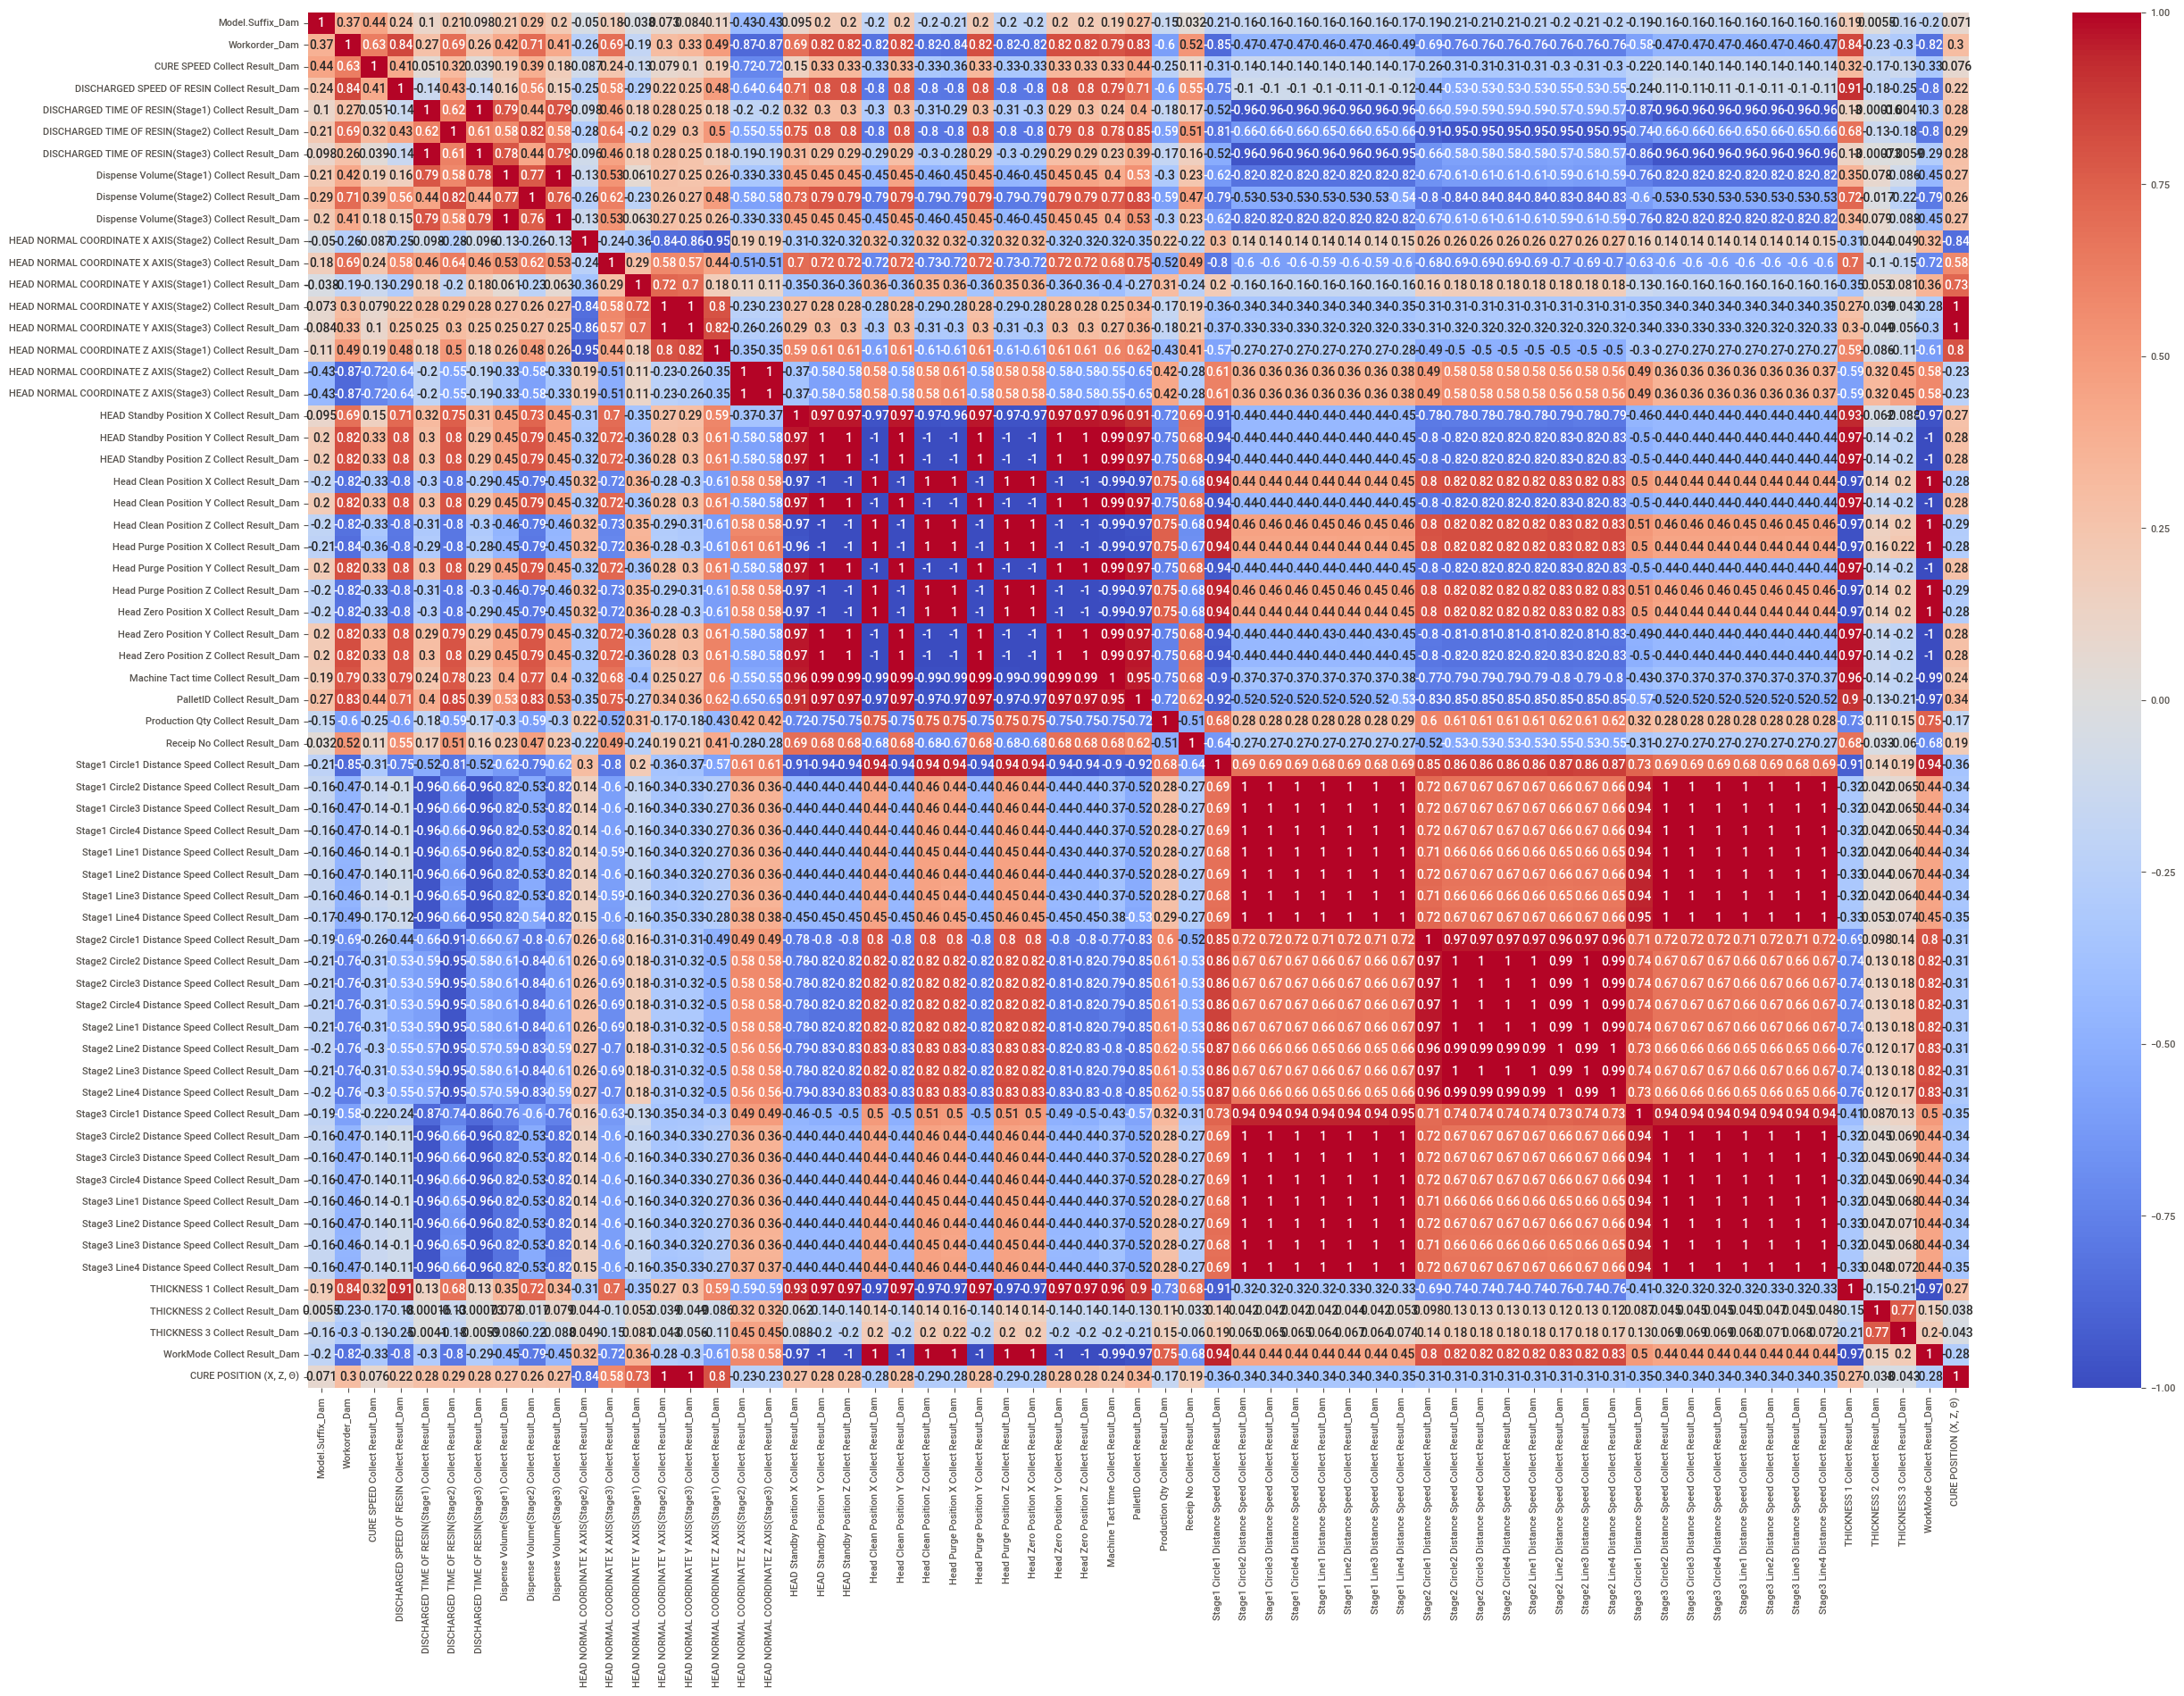

In [348]:
import matplotlib.pyplot as plt
import seaborn as sns
# 상관 행렬 계산
corr_matrix = df1_cleaned.corr()

# 히트맵 그리기
plt.figure(figsize=(30, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [364]:
# 결측값을 평균값으로 대체
df1_cleaned.fillna(df1_cleaned.mean(), inplace=True)
# 상관 행렬 계산
corr_matrix = df1_cleaned.corr().abs()

# 절댓값 0.9 이상의 상관관계를 가진 피처들 식별
high_corr_var = np.where(corr_matrix > 0.9)
high_corr_var = [(corr_matrix.index[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_var) if x != y]

# 고상관 피처들 추출
high_corr_features = list(set([item[0] for item in high_corr_var]))

# PCA 적용
pca = PCA(n_components=3)  # 원하는 성분 수 설정
pca_result = pca.fit_transform(df1_cleaned[high_corr_features])

# PCA 결과를 데이터프레임으로 변환
pca_df = pd.DataFrame(pca_result, columns=[f'PCA_df1{i+1}' for i in range(pca_result.shape[1])])

# 저상관 피처들 추출
low_corr_features = [col for col in df1_cleaned if col not in high_corr_features]

# 최종 데이터셋 결합
final_df1 = pd.concat([df1_cleaned[low_corr_features], pca_df], axis=1)

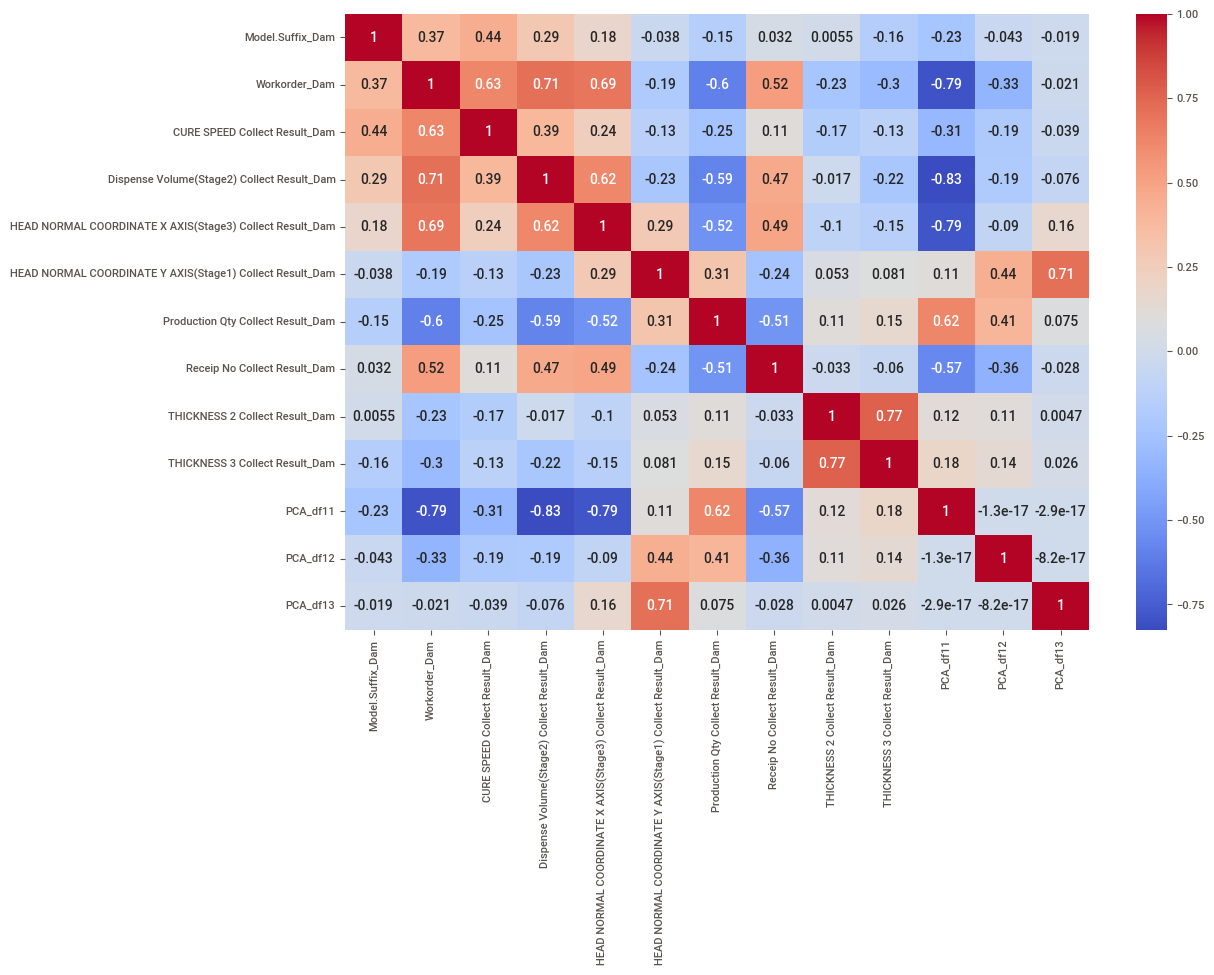

In [365]:
corr_matrix = final_df1.corr()

# 히트맵 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [351]:
df1_cleaned

Model.Suffix_Dam  Workorder_Dam  CURE SPEED Collect Result_Dam  \
0                     3            658                       2.666543   
1                     3            284                      -0.398000   
2                     0            590                       1.134271   
3                     0            252                      -0.398000   
4                     0            143                      -0.398000   
...                 ...            ...                            ...   
57862                 0            278                      -0.398000   
57863                 0            440                      -0.398000   
57864                 0            315                      -0.398000   
57865                 0              8                      -0.398000   
57866                 0            212                      -0.398000   

       DISCHARGED SPEED OF RESIN Collect Result_Dam  \
0                                          1.037272   
1                                         -0.964123   
2                                          1.037272   
3                                         -0.964123   
4                                         -0.964123   
...                                             ...   
57862                                     -0.964123   
57863                                      1.037272   
57864                                      1.037272   
57865                                     -0.964123   
57866                                     -0.964123   

       DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam  \
0                                               0.171515     
1                                               1.885632     
2                                               0.117949     
3                                               1.885632     
4                                              -1.221204     
...                                                  ...     
57862                                           1.885632     
57863                                          -0.283797     
57864                                          -0.283797     
57865                                          -1.221204     
57866                                           0.733960     

       DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam  \
0                                               0.773176     
1                                              -0.981116     
2                                               0.823298     
3                                               0.773176     
4                                              -0.981116     
...                                                  ...     
57862                                           1.875873     
57863                                           0.372195     
57864                                          -0.129031     
57865                                          -1.482342     
57866                                          -0.981116     

       DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam  \
0                                               0.120927     
1                                               1.893779     
2                                               0.120927     
3                                               1.893779     
4                                              -1.249005     
...                                                  ...     
57862                                           1.893779     
57863                                          -0.281994     
57864                                          -0.281994     
57865                                          -1.222144     
57866                                           0.765600     

       Dispense Volume(Stage1) Collect Result_Dam  \
0                                       -0.120752   
1                                        1.262255   
2                                        1.631056   
3                     

stage3

In [368]:
# 각 Stage에서의 DISCHARGED 양 계산
df3_cleaned['DISCHARGED_AMOUNT_STAGE1'] = df3_cleaned['DISCHARGED SPEED OF RESIN Collect Result_Fill1'] * df3_cleaned['DISCHARGED TIME OF RESIN(Stage1) Collect Result_Fill1']
df3_cleaned['DISCHARGED_AMOUNT_STAGE2'] = df3_cleaned['DISCHARGED SPEED OF RESIN Collect Result_Fill1'] * df3_cleaned['DISCHARGED TIME OF RESIN(Stage2) Collect Result_Fill1']
df3_cleaned['DISCHARGED_AMOUNT_STAGE3'] = df3_cleaned['DISCHARGED SPEED OF RESIN Collect Result_Fill1'] * df3_cleaned['DISCHARGED TIME OF RESIN(Stage3) Collect Result_Fill1']

# Dispense 양과 DISCHARGED 양의 상관계수 계산
correlation_stage1 = np.corrcoef(df3_cleaned['DISCHARGED_AMOUNT_STAGE1'], df3_cleaned['Dispense Volume(Stage1) Collect Result_Fill1'])[0, 1]
correlation_stage2 = np.corrcoef(df3_cleaned['DISCHARGED_AMOUNT_STAGE2'], df3_cleaned['Dispense Volume(Stage2) Collect Result_Fill1'])[0, 1]
correlation_stage3 = np.corrcoef(df3_cleaned['DISCHARGED_AMOUNT_STAGE3'], df3_cleaned['Dispense Volume(Stage3) Collect Result_Fill1'])[0, 1]

print(f"Stage 1 Correlation: {correlation_stage1}")
print(f"Stage 2 Correlation: {correlation_stage2}")
print(f"Stage 3 Correlation: {correlation_stage3}")

Stage 1 Correlation: 0.9795678484346718
Stage 2 Correlation: 0.9986658296558434
Stage 3 Correlation: 0.9571706530033471


In [369]:
df3_cleaned['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1']

0          NaN
1        838.4
2           OK
3        837.7
4        838.4
         ...  
57862      NaN
57863       OK
57864      NaN
57865    837.9
57866    838.4
Name: HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1, Length: 57867, dtype: object

In [371]:
df3_cleaned = df3_cleaned.drop(columns=['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1'])

In [373]:
# 범주형 열 선택
categorical_columns = df3_cleaned.select_dtypes(include=['object']).columns

# label encoder 생성
label_encoder = LabelEncoder()

# 범주형 열 label encoding
for column in categorical_columns:
    df3_cleaned[column] = label_encoder.fit_transform(df3_cleaned[column])

# 정규화할 열 선택
numerical_columns = df3_cleaned.select_dtypes(include=['float64', 'int64']).columns

# standard scaler 생성
scaler = StandardScaler()

# 정규화
for column in numerical_columns:
    df3_cleaned[column] = scaler.fit_transform(df3_cleaned[column].values.reshape(-1, 1))

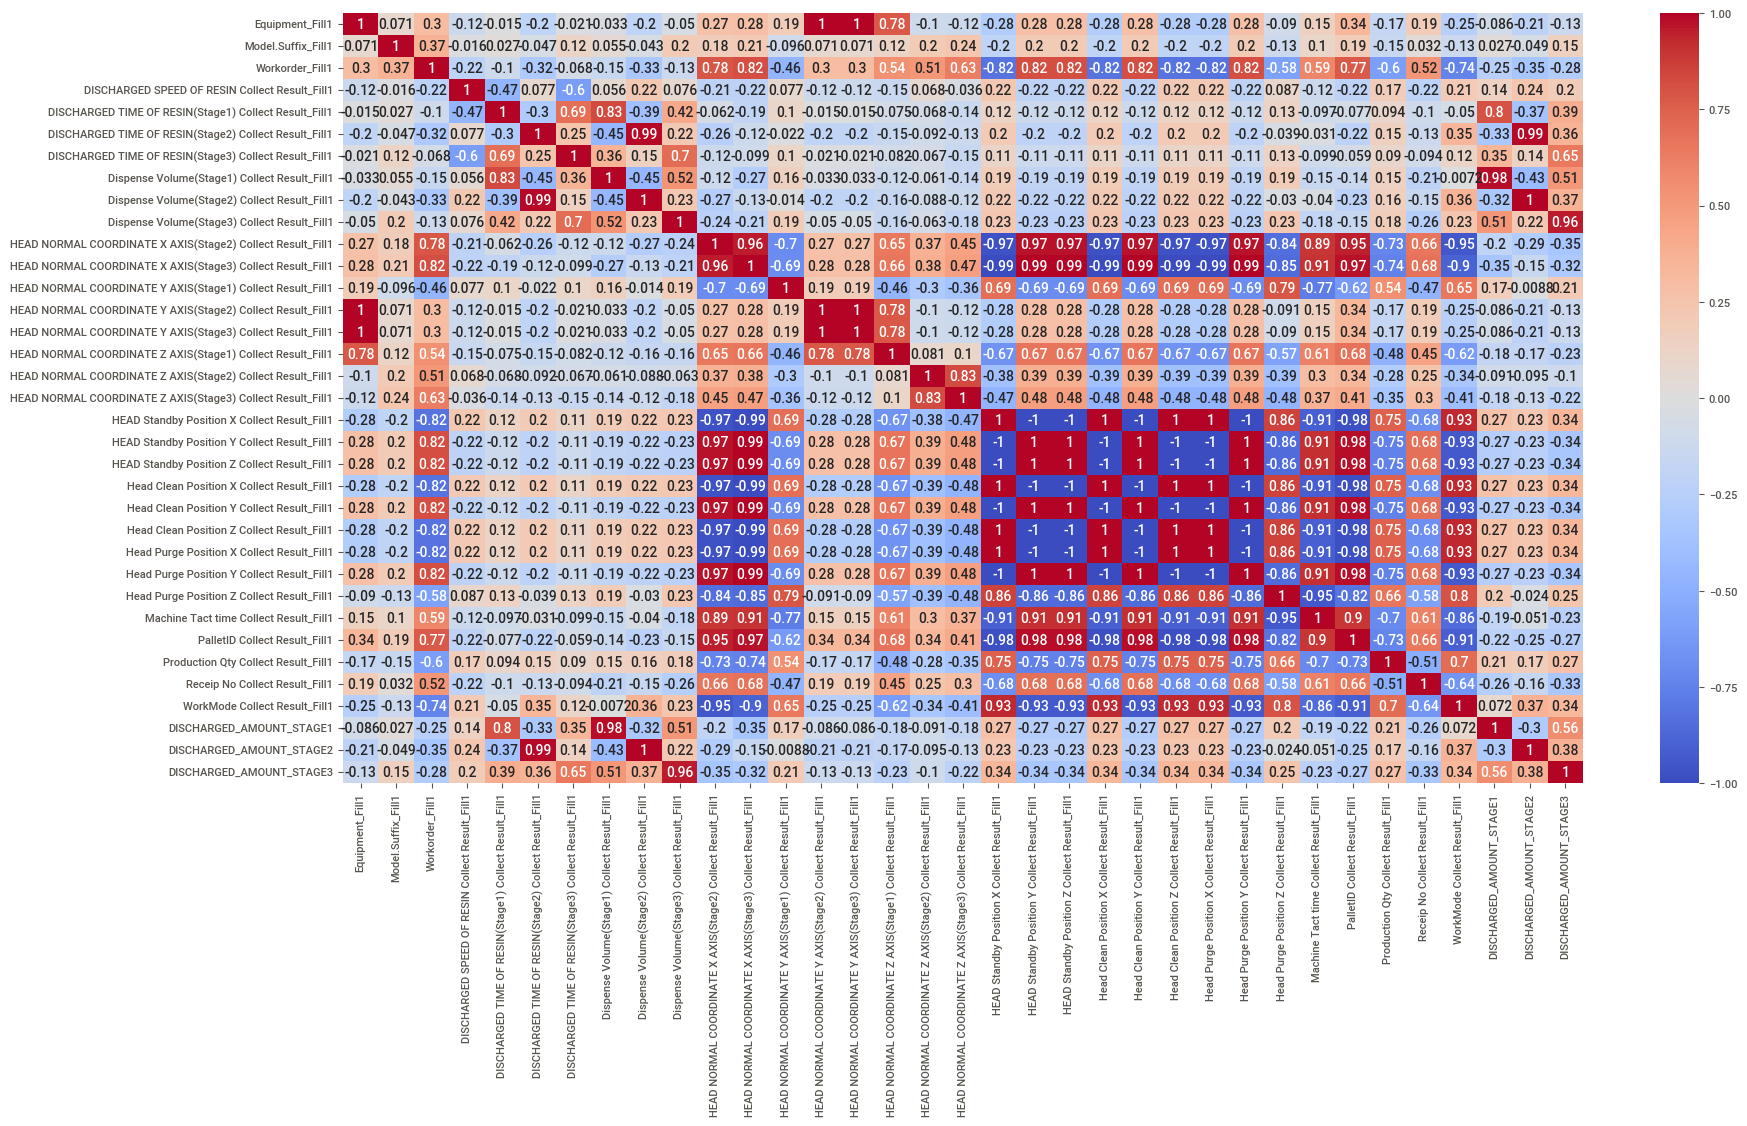

In [375]:
corr_matrix = df3_cleaned.corr()

# 히트맵 그리기
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [376]:
# 결측값을 평균값으로 대체
df3_cleaned.fillna(df3_cleaned.mean(), inplace=True)

# 상관 행렬 계산
corr_matrix = df3_cleaned.corr().abs()

# 절댓값 0.9 이상의 상관관계를 가진 피처들 식별
high_corr_var = np.where(corr_matrix > 0.9)
high_corr_var = [(corr_matrix.index[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_var) if x != y]

# 고상관 피처들 추출
high_corr_features = list(set([item[0] for item in high_corr_var]))

# PCA 적용
pca = PCA(n_components=3)  # 원하는 성분 수 설정
pca_result = pca.fit_transform(df3_cleaned[high_corr_features])

# PCA 결과를 데이터프레임으로 변환
pca_df = pd.DataFrame(pca_result, columns=[f'PCA_df3{i+1}' for i in range(pca_result.shape[1])])

# 저상관 피처들 추출
low_corr_features = [col for col in df3_cleaned if col not in high_corr_features]

# 최종 데이터셋 결합
final_df3 = pd.concat([df3_cleaned[low_corr_features], pca_df], axis=1)

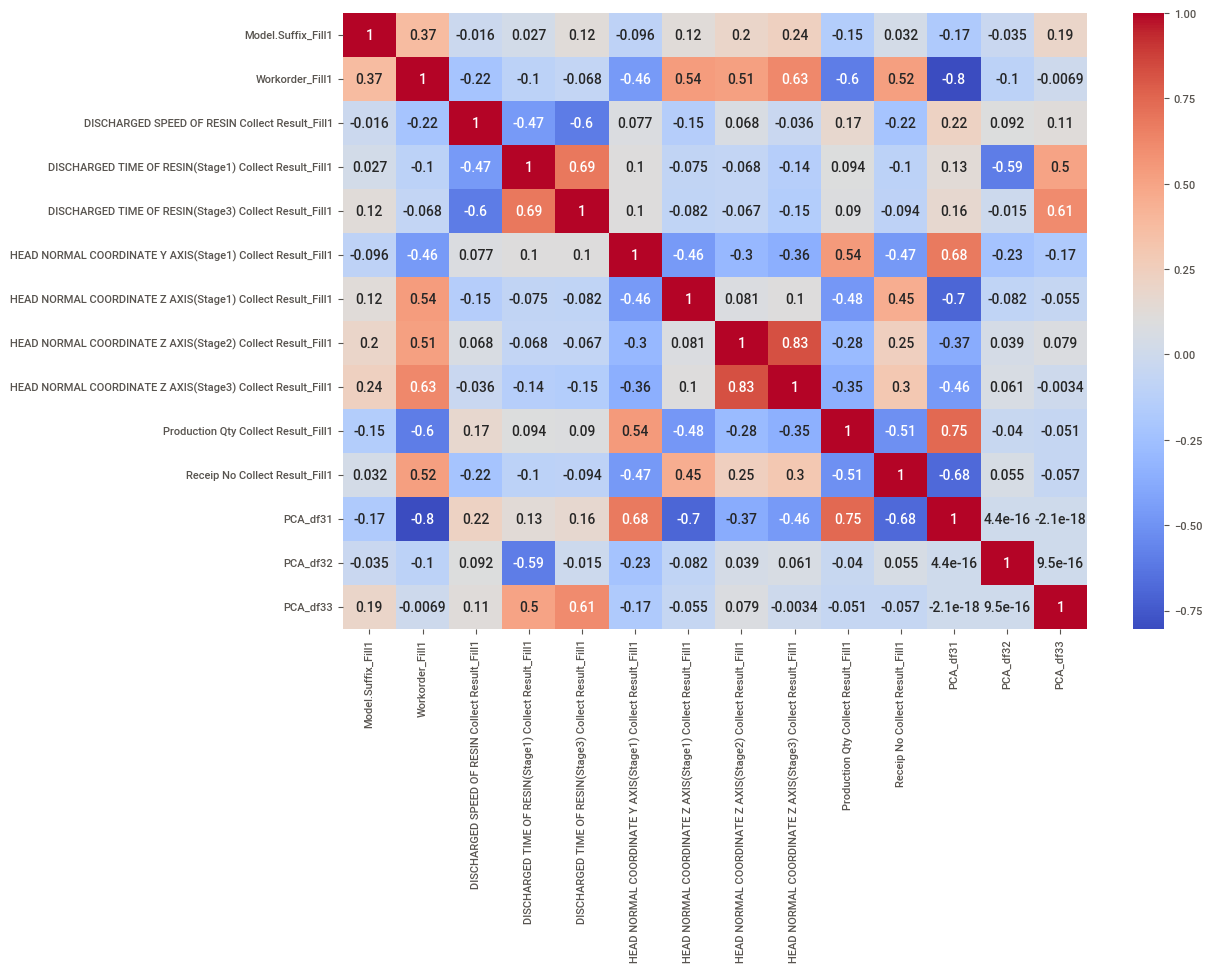

In [377]:
corr_matrix = final_df3.corr()

# 히트맵 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

예상치 못한 상관관계가 나왔을 때 반영할 수 있다.

In [378]:
df4_cleaned.isnull().sum()

Equipment_Fill2                                                   0
Model.Suffix_Fill2                                                0
Workorder_Fill2                                                   0
CURE END POSITION X Collect Result_Fill2                          0
CURE END POSITION Z Collect Result_Fill2                          0
CURE SPEED Collect Result_Fill2                                   0
CURE STANDBY POSITION Z Collect Result_Fill2                      0
CURE START POSITION X Collect Result_Fill2                        0
CURE START POSITION Z Collect Result_Fill2                        0
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2    18234
HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Fill2        0
HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill2        0
HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Fill2        0
HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill2        0
HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Re

In [379]:
df4_cleaned['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2']

0          NaN
1        835.5
2           OK
3          305
4        835.5
         ...  
57862      NaN
57863       OK
57864      NaN
57865    835.5
57866    835.5
Name: HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2, Length: 57867, dtype: object

In [380]:
# 'OK' 값을 결측치로 처리
df4_cleaned.loc[df4_cleaned['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2'] == 'OK', 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2'] = None

In [382]:
df4_cleaned = df4_cleaned.drop(columns=['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2'])

In [383]:
# 범주형 열 선택
categorical_columns = df4_cleaned.select_dtypes(include=['object']).columns

# label encoder 생성
label_encoder4 = LabelEncoder()

# 범주형 열 label encoding
for column in categorical_columns:
    df4_cleaned[column] = label_encoder4.fit_transform(df4_cleaned[column])

# 정규화할 열 선택
numerical_columns4 = df4_cleaned.select_dtypes(include=['float64', 'int64']).columns

# standard scaler 생성
scaler = StandardScaler()

# 정규화
for column in numerical_columns4:
    df4_cleaned[column] = scaler.fit_transform(df4_cleaned[column].values.reshape(-1, 1))
    
    

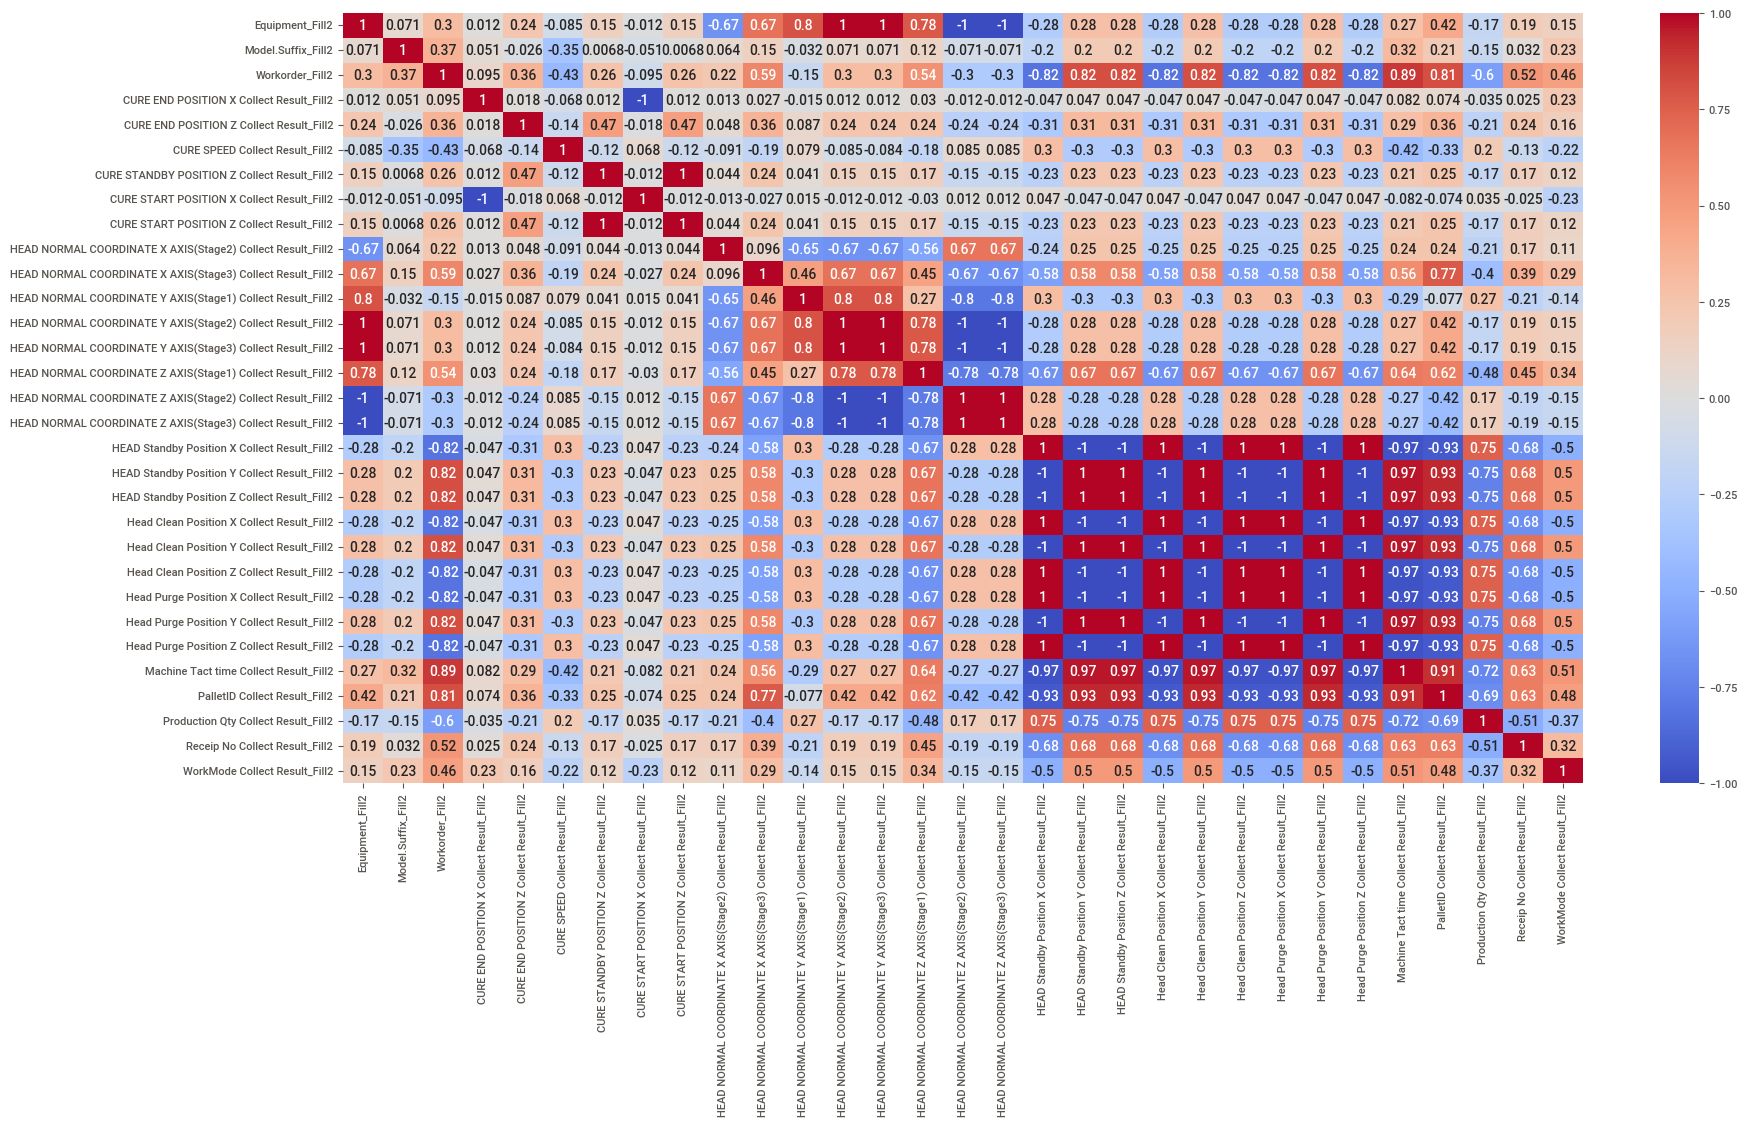

In [393]:
corr_matrix = df4_cleaned.corr()

# 히트맵 그리기
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [387]:
# 결측값을 평균값으로 대체
df4_cleaned.fillna(df4_cleaned.mean(), inplace=True)

# 상관 행렬 계산
corr_matrix = df4_cleaned.corr().abs()

# 절댓값 0.9 이상의 상관관계를 가진 피처들 식별
high_corr_var = np.where(corr_matrix > 0.9)
high_corr_var = [(corr_matrix.index[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_var) if x != y]

# 고상관 피처들 추출
high_corr_features = list(set([item[0] for item in high_corr_var]))

# PCA 적용
pca = PCA(n_components=1)  # 원하는 성분 수 설정
pca_result = pca.fit_transform(df4_cleaned[high_corr_features])

# PCA 결과를 데이터프레임으로 변환
pca_df = pd.DataFrame(pca_result, columns=[f'PCA_df4{i+1}' for i in range(pca_result.shape[1])])

# 저상관 피처들 추출
low_corr_features = [col for col in df4_cleaned if col not in high_corr_features]

# 최종 데이터셋 결합
final_df4 = pd.concat([df4_cleaned[low_corr_features], pca_df], axis=1)



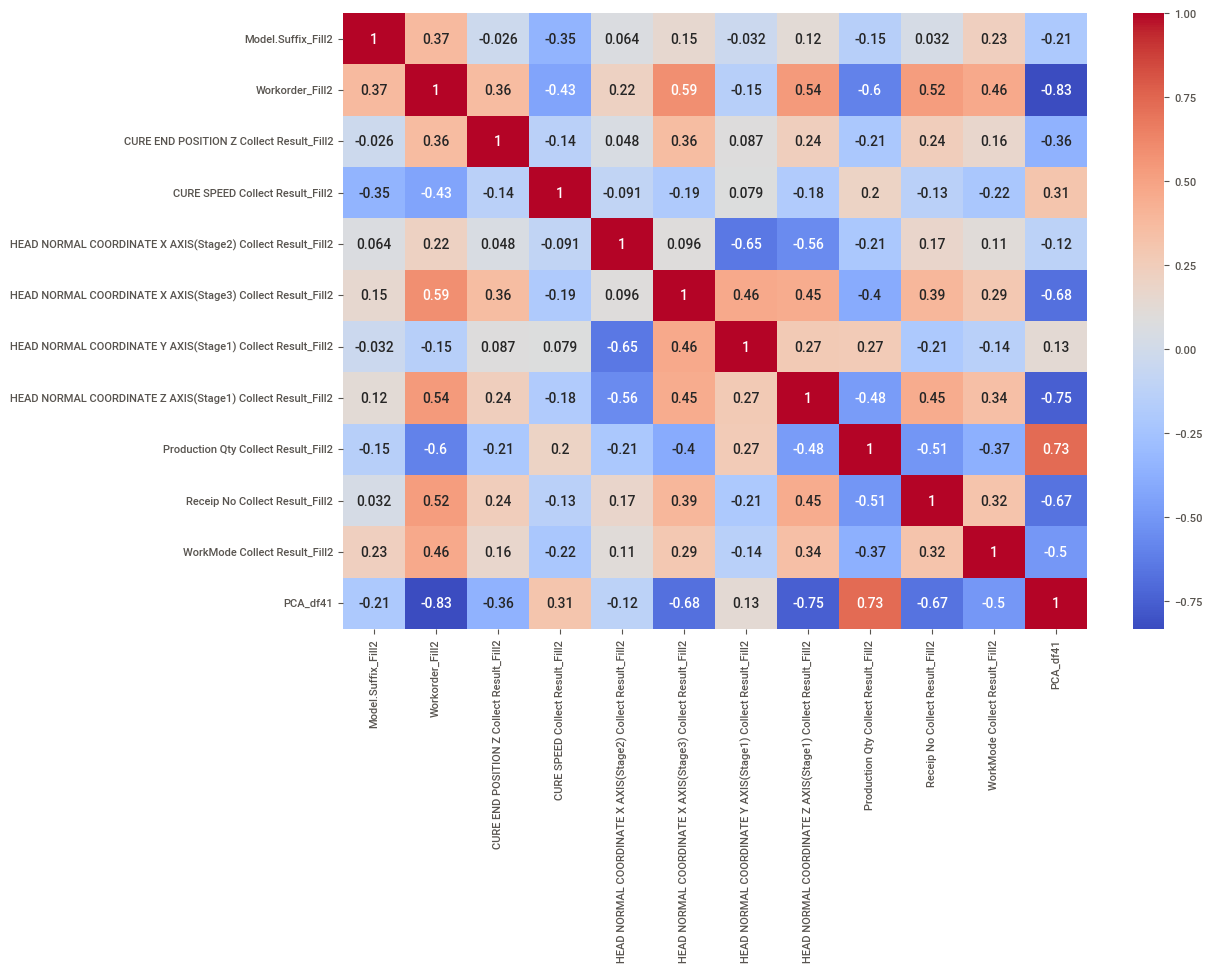

In [388]:
corr_matrix = final_df4.corr()

# 히트맵 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [230]:
! pip install sweetviz

In [389]:
#범주형 열 선택
categorical_columns = df2_cleaned.select_dtypes(include=['object']).columns

# label encoder 생성
label_encoder = LabelEncoder()

# 범주형 열 label encoding
for column in categorical_columns:
    df2_cleaned[column] = label_encoder.fit_transform(df2_cleaned[column])



In [390]:
df2_label_N = df2_cleaned[target == 'Normal']
df2_label_A = df2_cleaned[target == 'AbNormal']

In [316]:
df2_label_N

Model.Suffix_AutoClave  Workorder_AutoClave  \
0                           3                  658   
1                           3                  284   
2                           0                  590   
3                           0                  252   
4                           0                  143   
...                       ...                  ...   
40500                       0                  307   
40501                       0                  239   
40502                       0                  644   
40503                       0                  541   
40504                       0                  165   

       1st Pressure Collect Result_AutoClave  \
0                                      0.312   
1                                      0.311   
2                                      0.315   
3                                      0.299   
4                                      0.302   
...                                      ...   
40500                                  0.304   
40501                                  0.300   
40502                                  0.305   
40503                                  0.309   
40504                                  0.302   

       1st Pressure 1st Pressure Unit Time_AutoClave  \
0                                                240   
1                                                241   
2                                                241   
3                                                241   
4                                                240   
...                                              ...   
40500                                            241   
40501                                            241   
40502                                            240   
40503                                            241   
40504                                            241   

       2nd Pressure Collect Result_AutoClave  \
0                                      0.493   
1                                      0.311   
2                                      0.490   
3                                      0.300   
4                                      0.302   
...                                      ...   
40500                                  0.305   
40501                                  0.300   
40502                                  0.493   
40503                                  0.490   
40504                                  0.303   

       2nd Pressure Unit Time_AutoClave  \
0                                     1   
1                                   121   
2                                     1   
3                                   121   
4                                   120   
...                                 ...   
40500                                90   
40501                               121   
40502                                 1   
40503                                 1   
40504                               121   

       3rd Pressure Collect Result_AutoClave  \
0                                      0.499   
1                                      0.498   
2                                      0.498   
3                                      0.500   
4                                      0.498   
...                                      ...   
40500                                  0.499   
40501                                  0.500   
40502                                  0.498   
40503                                  0.498   
40504                                  0.499   

       3rd Pressure Unit Time_AutoClave  \
0                                   120   
1                                   121   
2                                   121   
3                                   121   
4                                   120   
...                                 ...   
40500                               121   
40501                               121   
40502                               120   
40503  

In [317]:
import sweetviz as sv
# Sweetviz 비교 분석 수행
my_report = sv.compare([df2_label_N, "Label N"], [df2_label_A, "Label A"])

# 결과 보고서 출력
my_report.show_html("label_comparison_report.html")

                                             |          | [  0%]   00:00 -> (? left)

Report label_comparison_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


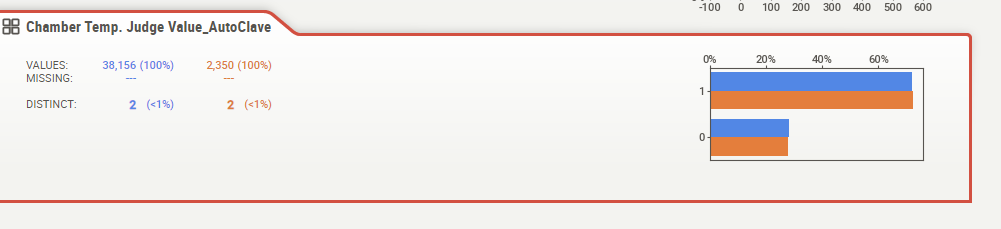

온도가 적정 기준에 맞는지 OK, NG로 나타내는 것이지만, 굉장히 uniform 하다. 결과에 도움이 안될 거 같음!

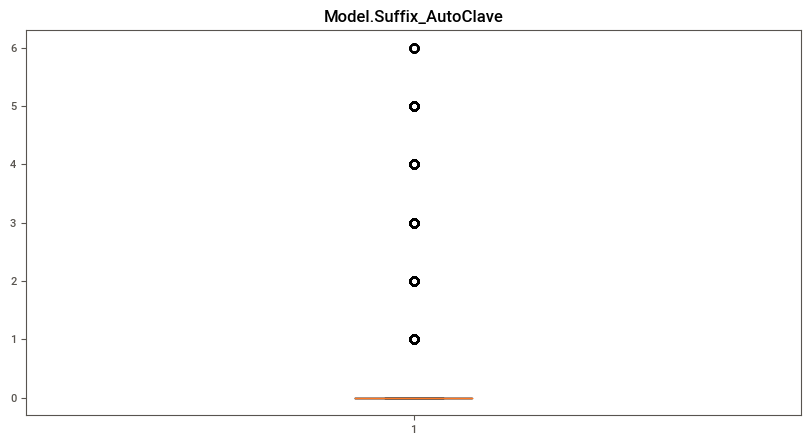

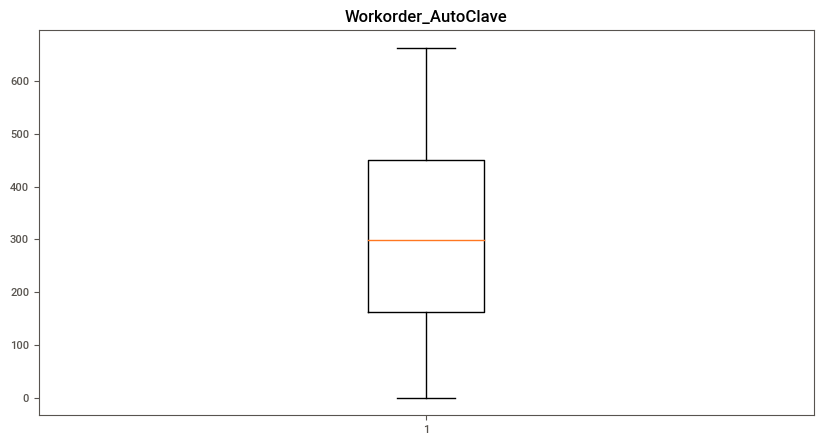

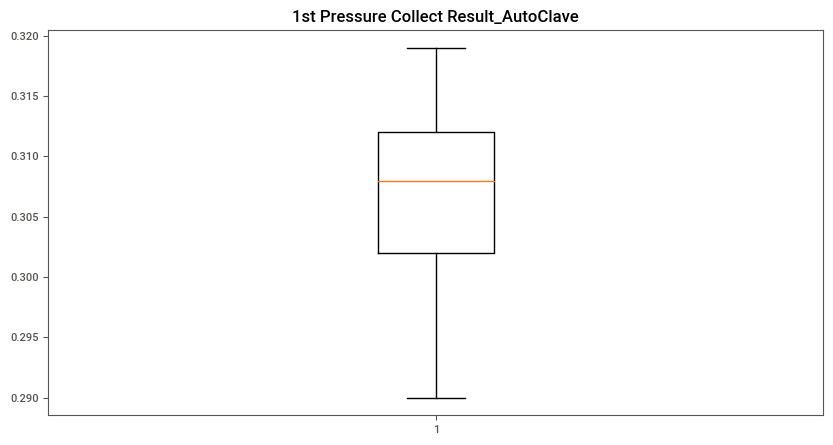

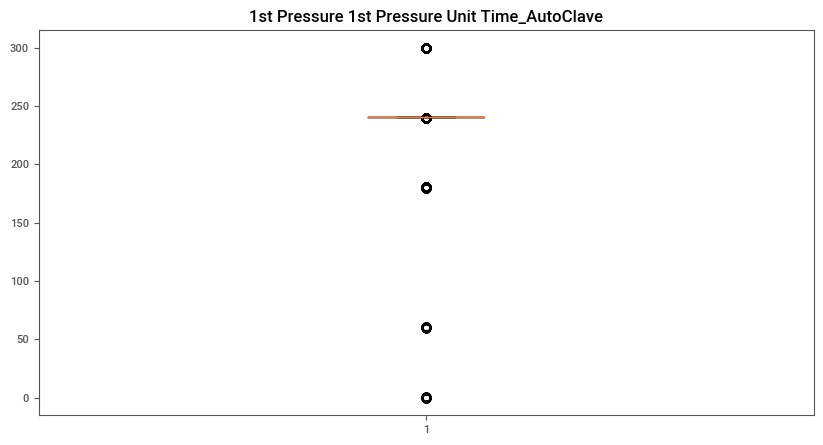

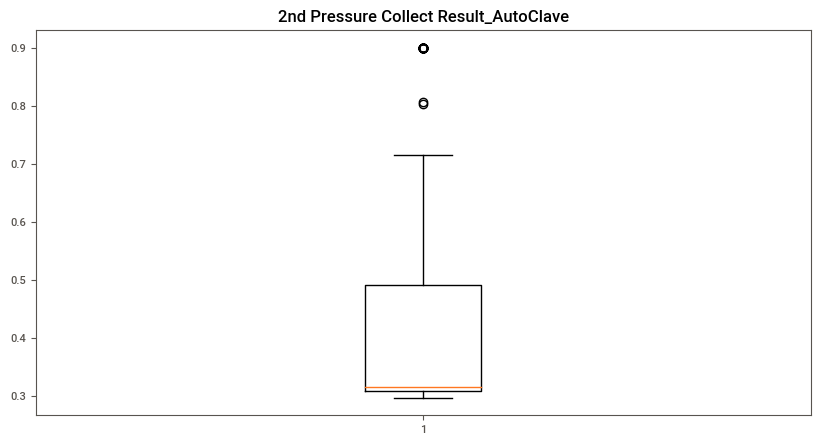

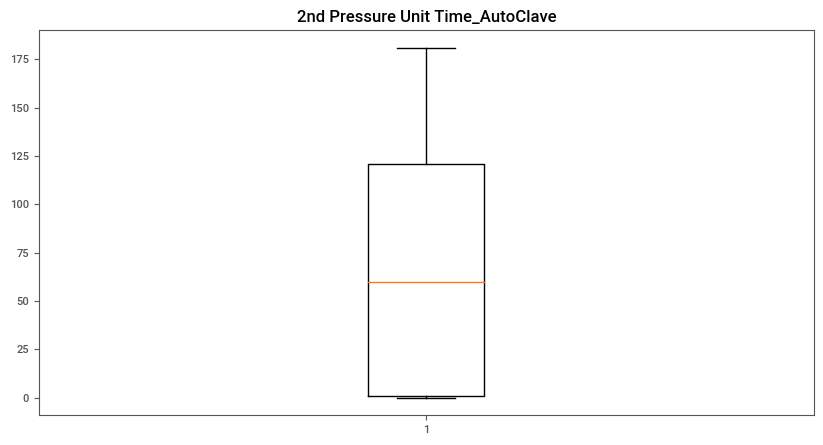

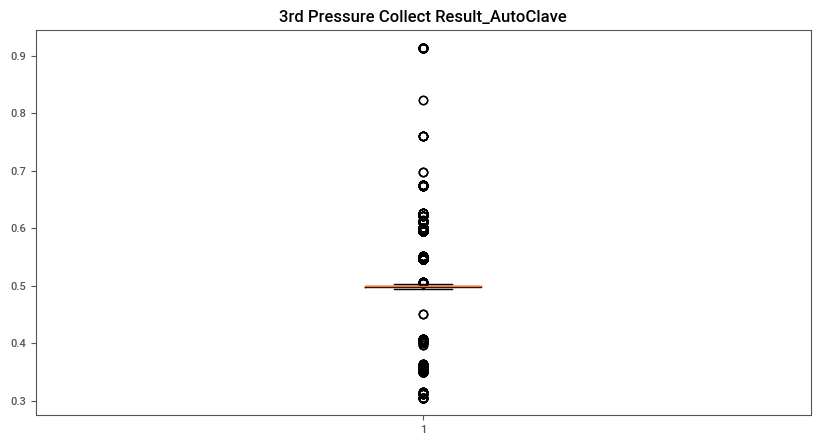

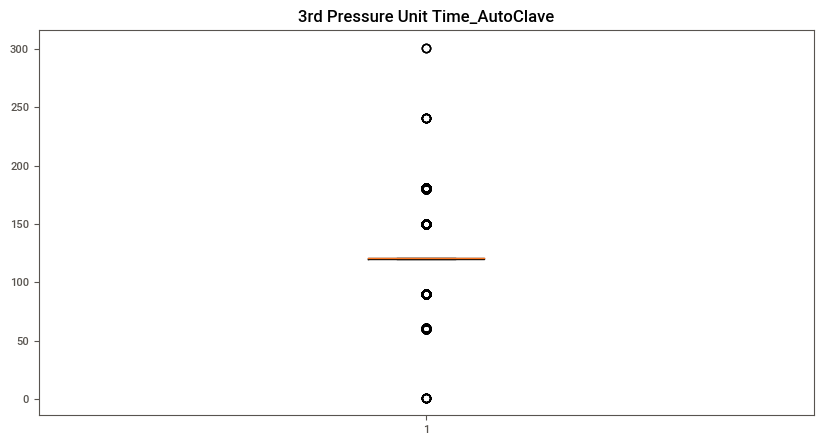

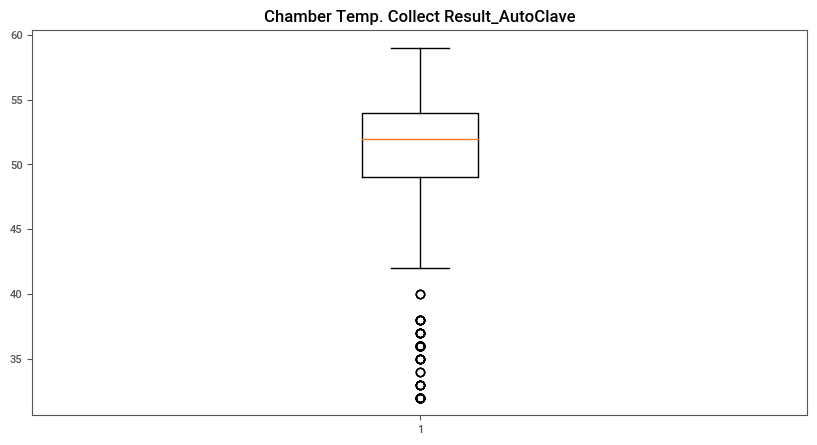

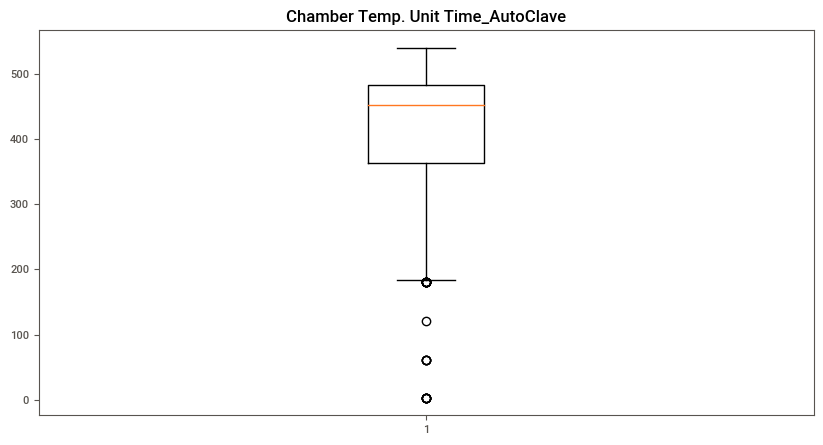

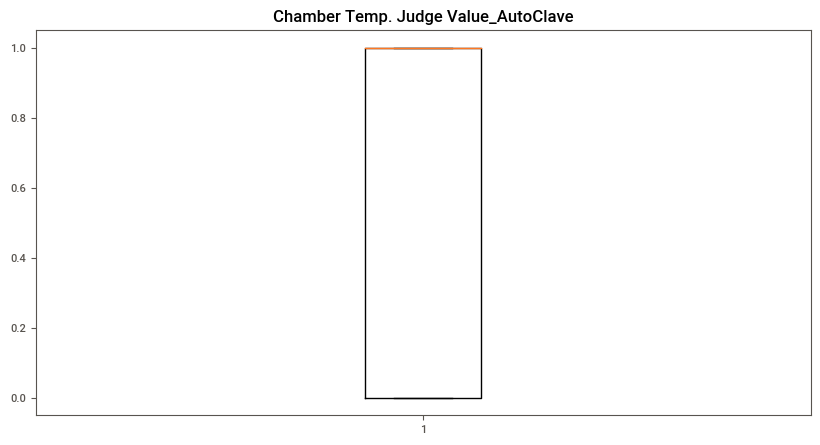

In [241]:
# 각 column에 대한 boxplot 그리기
for column in df2_cleaned.columns:
    plt.figure(figsize=(10, 5))
    plt.title(column)
    plt.boxplot(df2_cleaned[column])
    plt.show()

In [391]:
df2_cleaned['1st Pressure Total_AutoClave'] = df2_cleaned['1st Pressure Collect Result_AutoClave']*df2_cleaned['1st Pressure 1st Pressure Unit Time_AutoClave']
df2_cleaned['2nd Pressure Total_AutoClave'] = df2_cleaned['2nd Pressure Collect Result_AutoClave']*df2_cleaned['2nd Pressure Unit Time_AutoClave']
df2_cleaned['3rd Pressure Total_AutoClave'] = df2_cleaned['3rd Pressure Collect Result_AutoClave']*df2_cleaned['3rd Pressure Unit Time_AutoClave']
df2_cleaned['Chamber Temp Total_AutoClave'] = df2_cleaned['Chamber Temp. Collect Result_AutoClave']*df2_cleaned['Chamber Temp. Unit Time_AutoClave']

In [392]:
# 정규화할 열 선택
numerical_columns = df2_cleaned.select_dtypes(include=['float64', 'int64']).columns

# standard scaler 생성
scaler = StandardScaler()

# 정규화
for column in numerical_columns:
    df2_cleaned[column] = scaler.fit_transform(df2_cleaned[column].values.reshape(-1, 1))

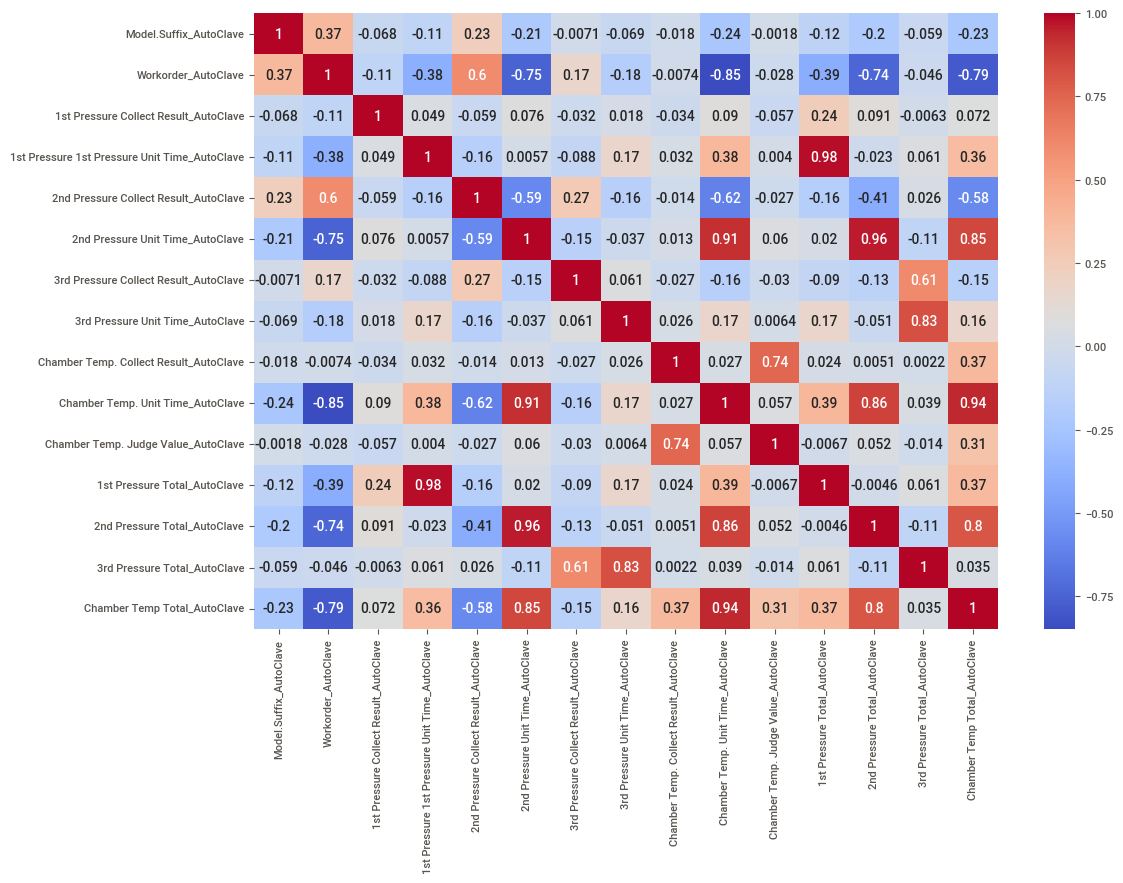

In [395]:
corr_matrix = df2_cleaned.corr()

# 히트맵 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [396]:
# 결측값을 평균값으로 대체
df2_cleaned.fillna(df2_cleaned.mean(), inplace=True)

# 상관 행렬 계산
corr_matrix = df2_cleaned.corr().abs()

# 절댓값 0.9 이상의 상관관계를 가진 피처들 식별
high_corr_var = np.where(corr_matrix > 0.9)
high_corr_var = [(corr_matrix.index[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_var) if x != y]

# 고상관 피처들 추출
high_corr_features = list(set([item[0] for item in high_corr_var]))

# PCA 적용
pca = PCA(n_components=1)  # 원하는 성분 수 설정
pca_result = pca.fit_transform(df2_cleaned[high_corr_features])

# PCA 결과를 데이터프레임으로 변환
pca_df = pd.DataFrame(pca_result, columns=[f'PCA_df2{i+1}' for i in range(pca_result.shape[1])])

# 저상관 피처들 추출
low_corr_features = [col for col in df2_cleaned if col not in high_corr_features]

# 최종 데이터셋 결합
final_df2 = pd.concat([df2_cleaned[low_corr_features], pca_df], axis=1)



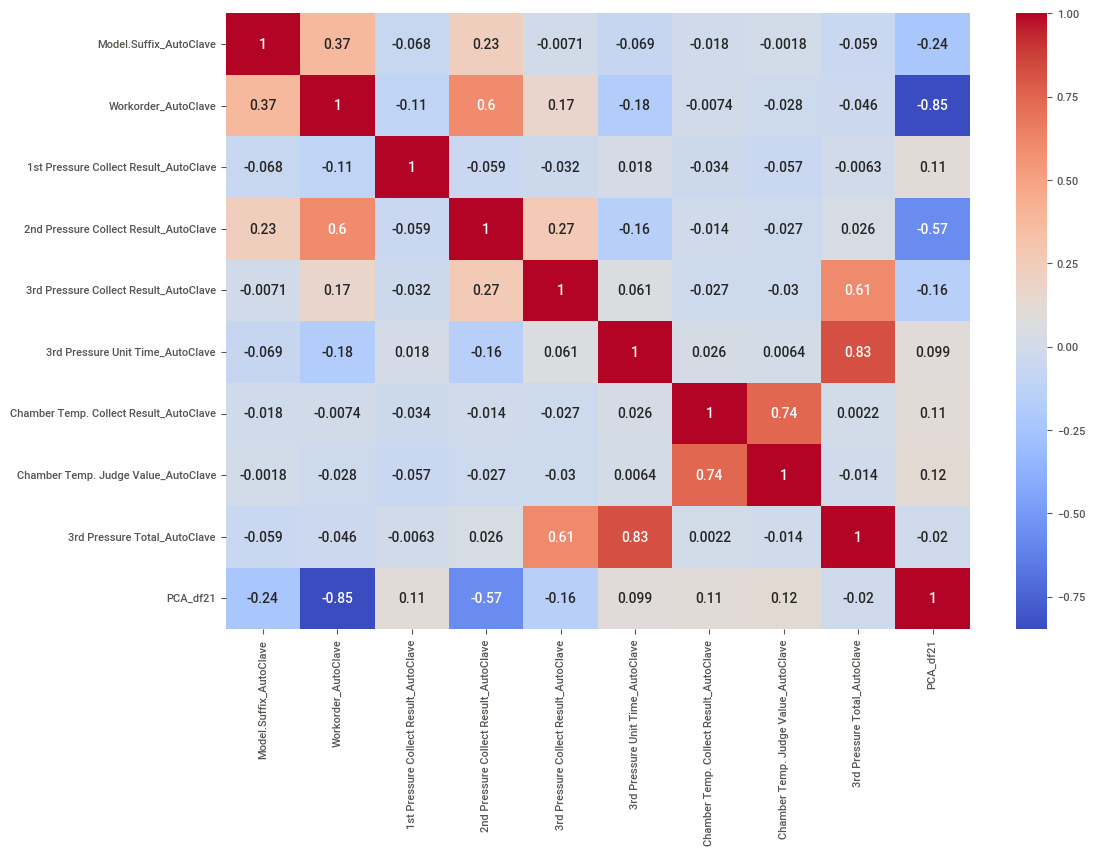

In [397]:
corr_matrix = final_df2.corr()

# 히트맵 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [398]:
print(final_df1.shape[0])
print(final_df2.shape[0])
print(final_df3.shape[0])
print(final_df4.shape[0])

57867
57867
57867
57867


In [537]:
data = pd.concat([final_df1, final_df2, final_df3, final_df4], axis=1)

In [538]:
data.isnull().sum()

Model.Suffix_Dam                                              0
Workorder_Dam                                                 0
CURE SPEED Collect Result_Dam                                 0
Dispense Volume(Stage2) Collect Result_Dam                    0
HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam      0
HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam      0
Production Qty Collect Result_Dam                             0
Receip No Collect Result_Dam                                  0
THICKNESS 2 Collect Result_Dam                                0
THICKNESS 3 Collect Result_Dam                                0
PCA_df11                                                      0
PCA_df12                                                      0
PCA_df13                                                      0
Model.Suffix_AutoClave                                        0
Workorder_AutoClave                                           0
1st Pressure Collect Result_AutoClave   

In [539]:
train=data[df['tt']=='train']
test =data[df['tt']=='test']

In [540]:
train.isnull().sum()

Model.Suffix_Dam                                              0
Workorder_Dam                                                 0
CURE SPEED Collect Result_Dam                                 0
Dispense Volume(Stage2) Collect Result_Dam                    0
HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam      0
HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam      0
Production Qty Collect Result_Dam                             0
Receip No Collect Result_Dam                                  0
THICKNESS 2 Collect Result_Dam                                0
THICKNESS 3 Collect Result_Dam                                0
PCA_df11                                                      0
PCA_df12                                                      0
PCA_df13                                                      0
Model.Suffix_AutoClave                                        0
Workorder_AutoClave                                           0
1st Pressure Collect Result_AutoClave   

In [541]:
test.shape

(17361, 49)

In [542]:
test_target

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
17356   NaN
17357   NaN
17358   NaN
17359   NaN
17360   NaN
Name: target, Length: 17361, dtype: float64

In [543]:
test_target

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
17356   NaN
17357   NaN
17358   NaN
17359   NaN
17360   NaN
Name: target, Length: 17361, dtype: float64

In [544]:
train.loc[:, 'target'] = train_target
train

C:\Users\whgy1\AppData\Local\Temp\ipykernel_49076\2475342777.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.loc[:, 'target'] = train_target


Model.Suffix_Dam  Workorder_Dam  CURE SPEED Collect Result_Dam  \
0                     3            658                       2.666543   
1                     3            284                      -0.398000   
2                     0            590                       1.134271   
3                     0            252                      -0.398000   
4                     0            143                      -0.398000   
...                 ...            ...                            ...   
40501                 0            239                      -0.398000   
40502                 0            644                       2.666543   
40503                 0            541                       2.666543   
40504                 0            165                      -0.398000   
40505                 0             46                      -0.398000   

       Dispense Volume(Stage2) Collect Result_Dam  \
0                                        0.313865   
1                                       -0.965479   
2                                        2.179574   
3                                        0.313865   
4                                       -0.965479   
...                                           ...   
40501                                   -0.912173   
40502                                    0.367171   
40503                                    0.260559   
40504                                   -0.965479   
40505                                   -1.338620   

       HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam  \
0                                               0.592663          
1                                              -1.445434          
2                                               0.600050          
3                                               1.181595          
4                                              -1.454163          
...                                                  ...          
40501                                          -1.445434          
40502                                           0.605422          
40503                                           0.589977          
40504                                           1.176895          
40505                                          -1.447448          

       HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam  \
0                                              -0.941972          
1                                              -0.218904          
2                                               0.365177          
3                                               2.776857          
4                                              -0.218234          
...                                                  ...          
40501                                          -0.218904          
40502                                           0.369866          
40503                                          -0.941638          
40504                                           2.767479          
40505                                          -0.218234          

       Production Qty Collect Result_Dam  Receip No Collect Result_Dam  \
0                              -0.632012                      0.137183   
1                               1.063551                     -0.824015   
2                              -0.603436                     -0.274759   
3                               1.854180                     -0.824015   
4                               0.453910                     -0.824015   
...                                  ...                           ...   
40501                           2.330462                     -0.824015   
40502                          -0.565333                      0.671182   
40503                          -0.689166                     -0.625672   
40504                           0.415808                     -0.824015   
40505                           2.349513                     -0.82401

In [545]:
train

Model.Suffix_Dam  Workorder_Dam  CURE SPEED Collect Result_Dam  \
0                     3            658                       2.666543   
1                     3            284                      -0.398000   
2                     0            590                       1.134271   
3                     0            252                      -0.398000   
4                     0            143                      -0.398000   
...                 ...            ...                            ...   
40501                 0            239                      -0.398000   
40502                 0            644                       2.666543   
40503                 0            541                       2.666543   
40504                 0            165                      -0.398000   
40505                 0             46                      -0.398000   

       Dispense Volume(Stage2) Collect Result_Dam  \
0                                        0.313865   
1                                       -0.965479   
2                                        2.179574   
3                                        0.313865   
4                                       -0.965479   
...                                           ...   
40501                                   -0.912173   
40502                                    0.367171   
40503                                    0.260559   
40504                                   -0.965479   
40505                                   -1.338620   

       HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam  \
0                                               0.592663          
1                                              -1.445434          
2                                               0.600050          
3                                               1.181595          
4                                              -1.454163          
...                                                  ...          
40501                                          -1.445434          
40502                                           0.605422          
40503                                           0.589977          
40504                                           1.176895          
40505                                          -1.447448          

       HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam  \
0                                              -0.941972          
1                                              -0.218904          
2                                               0.365177          
3                                               2.776857          
4                                              -0.218234          
...                                                  ...          
40501                                          -0.218904          
40502                                           0.369866          
40503                                          -0.941638          
40504                                           2.767479          
40505                                          -0.218234          

       Production Qty Collect Result_Dam  Receip No Collect Result_Dam  \
0                              -0.632012                      0.137183   
1                               1.063551                     -0.824015   
2                              -0.603436                     -0.274759   
3                               1.854180                     -0.824015   
4                               0.453910                     -0.824015   
...                                  ...                           ...   
40501                           2.330462                     -0.824015   
40502                          -0.565333                      0.671182   
40503                          -0.689166                     -0.625672   
40504                           0.415808                     -0.824015   
40505                           2.349513                     -0.82401

In [546]:
test.loc[:, 'target'] = test_target
test

C:\Users\whgy1\AppData\Local\Temp\ipykernel_49076\3614855941.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'target'] = test_target


Model.Suffix_Dam  Workorder_Dam  CURE SPEED Collect Result_Dam  \
40506                 0            241                         -0.398   
40507                 0            510                         -0.398   
40508                 0            128                         -0.398   
40509                 0            307                         -0.398   
40510                 0            416                         -0.398   
...                 ...            ...                            ...   
57862                 0            278                         -0.398   
57863                 0            440                         -0.398   
57864                 0            315                         -0.398   
57865                 0              8                         -0.398   
57866                 0            212                         -0.398   

       Dispense Volume(Stage2) Collect Result_Dam  \
40506                                   -0.965479   
40507                                    0.313865   
40508                                   -0.965479   
40509                                    1.166760   
40510                                   -0.005971   
...                                           ...   
57862                                    1.166760   
57863                                    0.047335   
57864                                    1.060148   
57865                                   -1.338620   
57866                                   -0.965479   

       HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam  \
40506                                           1.176895          
40507                                           0.600050          
40508                                          -1.450806          
40509                                           0.611466          
40510                                           0.588634          
...                                                  ...          
57862                                           0.600721          
57863                                           0.602064          
57864                                           0.597363          
57865                                          -1.447448          
57866                                          -1.447448          

       HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam  \
40506                                           2.775182          
40507                                           0.365177          
40508                                          -0.218234          
40509                                           0.371541          
40510                                          -0.942307          
...                                                  ...          
57862                                           0.366182          
57863                                           0.366182          
57864                                          -0.938958          
57865                                          -0.218234          
57866                                          -0.218904          

       Production Qty Collect Result_Dam  Receip No Collect Result_Dam  \
40506                           1.158808                     -0.824015   
40507                          -0.565333                      1.121267   
40508                           0.234821                     -0.824015   
40509                          -0.565333                     -0.831643   
40510                          -0.689166                      0.808497   
...                                  ...                           ...   
57862                          -0.565333                      0.167698   
57863                          -0.584384                      1.296724   
57864                          -0.660589                     -0.328159   
57865                           0.415808                     -0.824015   
57866                          -0.022372                     -0.82401

In [547]:
test.shape

(17361, 50)

In [549]:
Xtest=X_test = test.drop('target', axis=1)

In [550]:
Xtest.shape

(17361, 49)

downsampling

In [495]:
normal_ratio = 1.0  # 1.0 means 1:1 ratio

df_normal = train[train["target"] == "Normal"]
df_abnormal = train[train["target"] == "AbNormal"]

num_normal = len(df_normal)
num_abnormal = len(df_abnormal)
print(f"  Total: Normal: {num_normal}, AbNormal: {num_abnormal}")

df_normal = df_normal.sample(n=int(num_abnormal * normal_ratio), replace=False, random_state=RANDOM_STATE)
df_concat = pd.concat([df_normal, df_abnormal], axis=0).reset_index(drop=True)
df_concat.value_counts("target")

  Total: Normal: 38156, AbNormal: 2350


target
AbNormal    2350
Normal      2350
Name: count, dtype: int64

In [496]:
X = df_concat.drop('target', axis=1)
y = df_concat['target']

In [449]:
! pip install catboost

  Obtaining dependency information for catboost from https://files.pythonhosted.org/packages/35/7e/35fa1a7cf6925ff438e849cca50c88b8d28e02d9c3486442f2f85b86184a/catboost-1.2.5-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.1 MB 330.3 kB/s eta 0:05:07
   ---------------------------------------- 0.1/101.1 MB 787.7 kB/s eta 0:02:09
   ---------------------------------------- 0.2/101.1 MB 1.6 MB/s eta 0:01:02
   ---------------------------------------- 0.3/101.1 MB 2.0 MB/s eta 0:00:52
   ---------------------------------------- 0.5/101.1 MB 2.2 MB/s eta 0:00:46
   ---------------------------------------- 0.6/101.1 MB 2.4 MB/s eta 0:00:42
   ---------------------------------------- 0.8/101.1 MB 2.5 MB/s eta 0:00:41
   ---------------------------------------- 0.9/101.1 MB 2.6 MB/s eta 0:00:39
   ---------------------------------------- 1.1/101.1 MB 2.6 MB/s eta 0:00:38
   ----------

In [451]:
!pip install optuna

  Obtaining dependency information for optuna from https://files.pythonhosted.org/packages/15/da/68883911855d8b4d521f9a370e4e6aab8232b91c1d8d5a8348c4680c6642/optuna-3.6.1-py3-none-any.whl.metadata
  Obtaining dependency information for alembic>=1.5.0 from https://files.pythonhosted.org/packages/df/ed/c884465c33c25451e4a5cd4acad154c29e5341e3214e220e7f3478aa4b0d/alembic-1.13.2-py3-none-any.whl.metadata
  Obtaining dependency information for colorlog from https://files.pythonhosted.org/packages/f3/18/3e867ab37a24fdf073c1617b9c7830e06ec270b1ea4694a624038fc40a03/colorlog-6.8.2-py3-none-any.whl.metadata
  Obtaining dependency information for Mako from https://files.pythonhosted.org/packages/03/62/70f5a0c2dd208f9f3f2f9afd103aec42ee4d9ad2401d78342f75e9b8da36/Mako-1.3.5-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/380.1 kB ? eta -:--:--
   ----------- ---------------------------- 112.6/380.1 kB 3.2 MB/s eta 0:00:01
   ------------------------------ --------- 286.7/3

In [498]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [499]:
X_train.isnull().sum()

Model.Suffix_Dam                                              0
Workorder_Dam                                                 0
CURE SPEED Collect Result_Dam                                 0
Dispense Volume(Stage2) Collect Result_Dam                    0
HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam      0
HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam      0
Production Qty Collect Result_Dam                             0
Receip No Collect Result_Dam                                  0
THICKNESS 2 Collect Result_Dam                                0
THICKNESS 3 Collect Result_Dam                                0
PCA_df11                                                      0
PCA_df12                                                      0
PCA_df13                                                      0
Model.Suffix_AutoClave                                        0
Workorder_AutoClave                                           0
1st Pressure Collect Result_AutoClave   

In [509]:
# 모델 생성
model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, eval_metric='F1', random_seed=42)

# 모델 학습
model.fit(X_train, y_train, eval_set=(X_val, y_val), verbose=100, early_stopping_rounds=100)

0:	learn: 0.6171932	test: 0.6064909	best: 0.6064909 (0)	total: 3.9ms	remaining: 3.89s
100:	learn: 0.7178822	test: 0.5874587	best: 0.6157068 (8)	total: 327ms	remaining: 2.91s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.6157068063
bestIteration = 8

Shrink model to first 9 iterations.


In [548]:
train.shape

(40506, 50)

In [551]:
X_test.shape

(17361, 49)

In [552]:
test_pred = model.predict(X_test)
test_pred

array(['AbNormal', 'Normal', 'AbNormal', ..., 'Normal', 'AbNormal',
       'Normal'], dtype=object)

In [553]:
X_test.shape

(17361, 49)

In [554]:
# 제출 데이터 읽어오기 (df_test는 전처리된 데이터가 저장됨)
df_sub = pd.read_csv("submission.csv")
df_sub["target"] = test_pred

# 제출 파일 저장
df_sub.to_csv("submission.csv", index=False)

PermissionError: [Errno 13] Permission denied: 'submission.csv'